In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
bank=pd.read_csv("banktrain.csv",sep=";")

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [7]:
#converting yes or no to 1 and 0 in the y column (Has the customer subscribed for a deposit?)

bank["y"]=np.where(bank["y"]=="yes",1,0)
bank["y"]=bank["y"].astype(str)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
bank["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [11]:
#converting month column to integer form 

from time import strptime
bank['month'] = bank['month'].apply(lambda x: strptime(x,'%b').tm_mon) 

bank["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [12]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Exploratory Data Analysis

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [14]:
bank.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
#removing outliers-leads to the removal of  3 unique values in the poutcome column

#Q1 = bank.quantile(0.25)
#Q3 = bank.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
    
#bank=bank[~((bank<(Q1-1.5*IQR))|(bank>(Q3+1.5*IQR))).any(axis=1)]

In [16]:
bank.shape

(45211, 17)

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

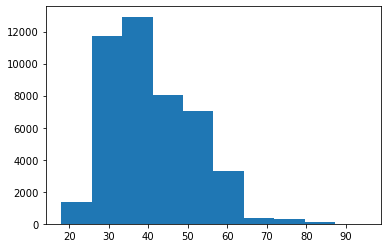

In [17]:
#age distribution

plt.hist(bank["age"])

In [18]:
#most customers belong to the 35-40 age bracket

bank["age"].describe()

#minimum age=18
#maximum age=95
#average age=40.9

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [19]:
#unique jobs

bank["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [20]:
#dataframe with job counts

job_df=pd.DataFrame(bank.groupby("job")["job"].count())
job_df.rename(columns = {'job':'Count'}, inplace = True)
job_df.sort_values(by="Count",ascending=False,inplace = True)
job_df

,Count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


([<matplotlib.patches.Wedge at 0x23efaf3e9d0>,
 [Text(0.8579171229478321, 0.6884607542575791, 'blue-collar'),
  Text(-0.46745516060273884, 0.9957337359082837, 'management'),
  Text(-1.0984421363087038, -0.058522416060610045, 'technician'),
  Text(-0.6483742631823141, -0.8886004810052669, 'admin.'),
  Text(0.019375584319636995, -1.0998293443676945, 'services'),
  Text(0.4918732509391826, -0.9839007597367329, 'retired'),
  Text(0.7340685906572577, -0.8192333637068671, 'self-employed'),
  Text(0.8906908427227288, -0.6454996690083392, 'entrepreneur'),
  Text(0.9983650714477644, -0.4618086011683849, 'unemployed'),
  Text(1.063999032524936, -0.279116568454831, 'housemaid'),
  Text(1.0939182993734373, -0.11551084059916929, 'student'),
  Text(1.0997797362289914, -0.022012082593211454, 'unknown')])

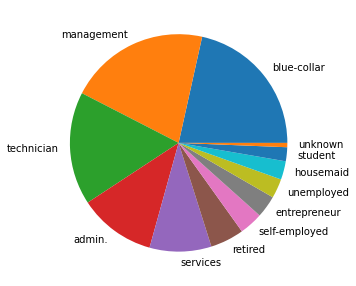

In [21]:
#pie chart depiction of the jobs

plt.figure(figsize=(10,5)) 
plt.pie(job_df.Count,labels=job_df.index)

In [22]:
#Blue-collar is the most common job with 9732 customers
#Least no. of people have unknown jobs

In [23]:
#unique marital statuses

bank["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [24]:
#dataframe with marital status counts

marital_df=pd.DataFrame(bank.groupby("marital")["marital"].count())
marital_df.rename(columns = {'marital':'Count'}, inplace = True)
marital_df.reset_index(inplace=True)
marital_df

,marital,Count
0,divorced,5207
1,married,27214
2,single,12790


<AxesSubplot:xlabel='marital', ylabel='Count'>

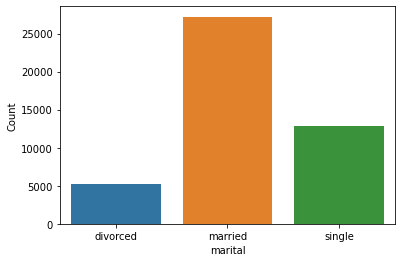

In [25]:
#bar plot of marital status

sns.barplot(data=marital_df,x="marital",y="Count")

In [26]:
#Most customers have married status
#Least number of customers are divorced 

In [27]:
#unique education

bank["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [28]:
#dataframe with education counts

edu_df=pd.DataFrame(bank.groupby("education")["education"].count())
edu_df.rename(columns = {'education':'Count'}, inplace = True)
edu_df.reset_index(inplace=True)
edu_df

,education,Count
0,primary,6851
1,secondary,23202
2,tertiary,13301
3,unknown,1857


<AxesSubplot:xlabel='education', ylabel='Count'>

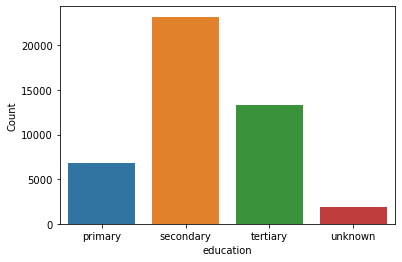

In [29]:
#bar plot of education status

sns.barplot(data=edu_df,x="education",y="Count")

In [30]:
#Majority of the customers have finished their secondary education

In [31]:
#analysing poutcome

bank["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [32]:
#dataframe with poutcome counts

pout_df=pd.DataFrame(bank.groupby("poutcome")["poutcome"].count())
pout_df.rename(columns = {'poutcome':'Count'}, inplace = True)
#pout_df.reset_index(inplace=True)
pout_df

,Count
poutcome,
failure,4901
other,1840
success,1511
unknown,36959


([<matplotlib.patches.Wedge at 0x23efb0ab100>,
 [Text(1.036825452093555, 0.3674139108566734, 'failure'),
  Text(0.7592670857159678, 0.7959356082927697, 'other'),
  Text(0.5551111487818668, 0.9496586821053532, 'success'),
  Text(-0.9240617250944482, -0.5967494685506411, 'unknown')])

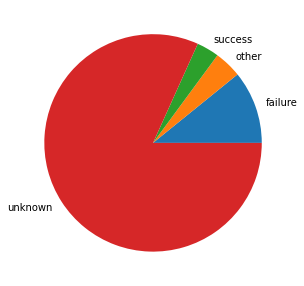

In [33]:
#pie chart depiction of the outcomes of the previous campaigns

plt.figure(figsize=(10,5)) 
plt.pie(pout_df.Count,labels=pout_df.index)

In [34]:
#Most outcomes are unknown
#Hence, it may not be a relevant feature for prediction

<AxesSubplot:>

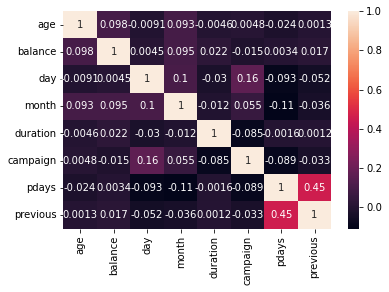

In [35]:
#how do the features affect each other?

sns.heatmap(bank.corr(),annot=True)


#only the pdays (days since last contact) and previous (no. of contacts before campaign) columns 
#have any significant correlation with each other

## Data Preprocessing

In [36]:
#Variance inflation factor-to find multicollinearity between columns

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in bank.columns:
    if ((bank[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = bank[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,age,7.762397
1,balance,1.221472
2,day,4.272265
3,month,6.504360
4,duration,1.918339
5,campaign,1.840293
6,pdays,1.455475
7,previous,1.341982


In [37]:
#age column has a vif of more than 6 and hence can be removed

bank=bank.drop(['age'], axis = 1) 

In [38]:
col_list = []
for col in bank.columns:
    if ((bank[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = bank[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,balance,1.209047
1,day,3.790652
2,month,4.193059
3,duration,1.815310
4,campaign,1.806466
5,pdays,1.426042
6,previous,1.341608


In [ ]:
#all columns have vif of less than 6 now and need not be dropped

In [39]:
bank.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [40]:
bank["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [41]:
#number of contacts during campaign

bank["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [42]:
bank["pdays"].unique()

#pdays(no. of days since last contact) has too many values

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [43]:
#number of contacts before campaign

bank["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [44]:
bank["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [45]:
bank["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [46]:
bank["duration"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [ ]:
#pdays, day, month and duration (in seconds) columns might create more noise due to numerous values.

In [49]:
#average yearly balance

bank_df["balance"].nunique()

#has more values but might be relevant to the dependent variable 

7168

In [47]:
#dropping unwanted columns

bank_df=bank.drop(["day","month"],axis=1)

In [48]:
bank_df.head()

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,0
1,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,0
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,0
3,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,0
4,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,0


In [5]:
#loading the test data

banktest=pd.read_csv("banktest.csv",sep=";")
print(banktest.shape)
banktest.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [51]:
test_df=banktest.drop(["age","day","month"],axis=1)
test_df.head()

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [52]:
#extracting the independent and dependent variables

#label encoding

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

bank_df=bank_df.apply(l.fit_transform)

bank_df

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,4,1,2,0,3036,1,0,2,261,0,0,0,3,0
1,9,2,1,0,945,1,0,2,151,0,0,0,3,0
2,2,1,1,0,918,1,1,2,76,0,0,0,3,0
3,1,1,3,0,2420,1,0,2,92,0,0,0,3,0
4,11,2,3,0,917,0,0,2,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,1741,0,0,0,975,2,0,0,3,1
45207,5,0,0,0,2639,0,0,0,456,1,0,0,3,1
45208,5,1,1,0,5455,0,0,0,1116,4,181,3,2,1
45209,1,1,1,0,1584,0,0,1,508,3,0,0,3,0


In [53]:
test_df=test_df.apply(l.fit_transform)

test_df

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,10,1,0,0,1475,0,0,0,75,0,0,0,3,0
1,7,1,1,0,2030,1,1,0,216,0,228,4,0,0
2,4,2,2,0,1303,1,0,0,181,0,219,1,0,0
3,4,1,2,0,1352,1,1,2,195,3,0,0,3,0
4,1,1,1,0,274,1,0,2,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,119,1,0,0,325,4,0,0,3,0
4517,6,1,2,1,0,1,1,2,149,0,0,0,3,0
4518,9,1,1,0,558,0,0,0,147,10,0,0,3,0
4519,1,1,1,0,1187,0,0,0,125,3,140,3,1,0


In [54]:
#independent and dependent training dataframes

x_train=bank_df.iloc[:,0:13]
x_train

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,4,1,2,0,3036,1,0,2,261,0,0,0,3
1,9,2,1,0,945,1,0,2,151,0,0,0,3
2,2,1,1,0,918,1,1,2,76,0,0,0,3
3,1,1,3,0,2420,1,0,2,92,0,0,0,3
4,11,2,3,0,917,0,0,2,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,1741,0,0,0,975,2,0,0,3
45207,5,0,0,0,2639,0,0,0,456,1,0,0,3
45208,5,1,1,0,5455,0,0,0,1116,4,181,3,2
45209,1,1,1,0,1584,0,0,1,508,3,0,0,3


In [55]:
y_train=bank_df["y"]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [56]:
#independent and dependent testing dataframes

x_test=test_df.iloc[:,0:13]
x_test

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,10,1,0,0,1475,0,0,0,75,0,0,0,3
1,7,1,1,0,2030,1,1,0,216,0,228,4,0
2,4,2,2,0,1303,1,0,0,181,0,219,1,0
3,4,1,2,0,1352,1,1,2,195,3,0,0,3
4,1,1,1,0,274,1,0,2,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,119,1,0,0,325,4,0,0,3
4517,6,1,2,1,0,1,1,2,149,0,0,0,3
4518,9,1,1,0,558,0,0,0,147,10,0,0,3
4519,1,1,1,0,1187,0,0,0,125,3,140,3,1


In [57]:
y_test=test_df["y"]
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int32

## Logistic Regression

In [58]:
#training the model

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

log.fit(x_train,y_train)

LogisticRegression()

In [59]:
#prediction

y_pred=log.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
#confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred)
cm

array([[3928,   72],
       [ 458,   63]], dtype=int64)

In [61]:
#accuracy score

accuracy_score(y_test,y_pred)

0.882769298827693

In [ ]:
#accuracy is 88.3%

In [62]:
from sklearn.metrics import recall_score, precision_score,f1_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.467
Recall: 0.121
F1 score: 0.192


## Decision Tree

In [63]:
#training the model

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
#prediction

y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[3684,  316],
       [ 314,  207]], dtype=int64)

In [66]:
#accuracy

accuracy_score(y_test,y_pred)

0.860650298606503

In [ ]:
#accuracy is 86%

In [67]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.396
Recall: 0.397
F1 score: 0.397


## Random Forest

In [68]:
#training the model

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)

rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [69]:
#prediction

y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[3938,   62],
       [ 355,  166]], dtype=int64)

In [71]:
#accuracy

accuracy_score(y_test,y_pred)

0.9077637690776377

In [ ]:
#accuracy is 90.8% and is better than the decision tree model

In [72]:
from sklearn.metrics import recall_score, precision_score,f1_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.728
Recall: 0.319
F1 score: 0.443


In [ ]:
#Better f1 score than the decision tree model

In [73]:
#combined independent dataframe

x=pd.concat([x_train,x_test],axis=0)
x

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,4,1,2,0,3036,1,0,2,261,0,0,0,3
1,9,2,1,0,945,1,0,2,151,0,0,0,3
2,2,1,1,0,918,1,1,2,76,0,0,0,3
3,1,1,3,0,2420,1,0,2,92,0,0,0,3
4,11,2,3,0,917,0,0,2,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,119,1,0,0,325,4,0,0,3
4517,6,1,2,1,0,1,1,2,149,0,0,0,3
4518,9,1,1,0,558,0,0,0,147,10,0,0,3
4519,1,1,1,0,1187,0,0,0,125,3,140,3,1


In [74]:
#combined independent dataframe

y=pd.concat([y_train,y_test],axis=0)
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 49732, dtype: int32

## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV
 
#Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
 
# Parameters to try
Parameter_Trials={'n_estimators':[100,200,300,500,1000],
                  'criterion':['gini','entropy'],
                  'max_depth': [2,3]}
 
Random_Search = RandomizedSearchCV(RF, Parameter_Trials, n_iter=5, cv=5, n_jobs=1, verbose=5)
RandomSearchResults=Random_Search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=1000;, score=0.883 total time=  10.9s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=1000;, score=0.883 total time=  10.9s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=1000;, score=0.883 total time=  11.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=1000;, score=0.883 total time=  10.5s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=1000;, score=0.886 total time=  10.6s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.883 total time=   5.6s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.883 total time=   5.6s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.883 total time=   5.6s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.883 total time=   5.5s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.887 total time=   5.6s


In [76]:
# Fetching the best hyperparameters
RandomSearchResults.best_params_
 
# All the parameter combinations tried by RandomizedSearchCV
RandomSearchResults.cv_results_['params']

[{'n_estimators': 1000, 'max_depth': 3, 'criterion': 'gini'},
 {'n_estimators': 500, 'max_depth': 3, 'criterion': 'entropy'},
 {'n_estimators': 1000, 'max_depth': 2, 'criterion': 'gini'},
 {'n_estimators': 200, 'max_depth': 2, 'criterion': 'entropy'},
 {'n_estimators': 200, 'max_depth': 2, 'criterion': 'gini'}]

In [77]:
#Using the best hyperparameters

rf=RandomForestClassifier(n_estimators=1000,max_depth=3,criterion='gini')

rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000)

In [78]:
#prediction

y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred)
cm

#no negative predictions?

array([[4000,    0],
       [ 521,    0]], dtype=int64)

In [80]:
#accuracy

accuracy_score(y_test,y_pred)

0.8847600088476001

In [ ]:
#accuracy of 88.48%

In [81]:
#Trying with {'n_estimators': 500, 'max_depth': 3, 'criterion': 'entropy'}

rf=RandomForestClassifier(n_estimators=500,max_depth=3,criterion='entropy')

rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=500)

In [82]:
#prediction

y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[4000,    0],
       [ 521,    0]], dtype=int64)

In [84]:
#accuracy

accuracy_score(y_test,y_pred)

0.8847600088476001

In [126]:
#accuracy is 88.48%

In [85]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Precision: 0.000
Recall: 0.000


In [86]:
f1_score(y_test, y_pred)

0.0

In [ ]:
#No precision and recall by the model 

In [ ]:
#Best model is the Random forest model with an accuracy of 90.8% and a precision of 73%
#Other hyperparameters predict with zero precision and recall